# Carga, Exploración y Limpieza de Datos

In [1]:
#Carga de librerias
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# fuente del dataset: (https://www.kaggle.com/datasets/heptapod/titanic)

In [2]:
#Carga del dataset
titanicds = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks_2AÑO1CUATRI/Aprendizaje Automatico/Clase 5/dataset/titanic.csv')
print (titanicds.head(8))


   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   
5            6  28.0   8.4583    0      0     0       0       0       0   
6            7  54.0  51.8625    0      0     0       0       0       0   
7            8   2.0  21.0750    0      3     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   


Al cargar el dataset obtenido de "Kaggle.com" podemos observar que el mismo presenta alteraciones, por lo que voy a proceder a realizar el pre-procesamiento comenzado por una limpieza y ajuste de los datos a investigar.

In [3]:
#Reemplazo de nombre columna '2urvived' a 'Survived'
titanicds.rename(columns={'2urvived': 'Survived'}, inplace=True)
titanicds

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
#Selección de columnas para nuestro análisis
col_validas = ['Passengerid',
               'Age',
               'Fare',
               'Sex',
               'sibsp',
               'Parch',
               'Pclass',
               'Embarked',
               'Survived'
]
df = titanicds[col_validas].copy()

In [5]:
#Creación dataset limpio
df = titanicds[col_validas].copy()

print("--- DataFrame Corregido y Limpio (Primeras 5 filas) ---")
display(df.head())

print("\n--- Información general del DataFrame corregido ---")
df.info()

--- DataFrame Corregido y Limpio (Primeras 5 filas) ---


,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0



--- Información general del DataFrame corregido ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   Survived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


In [6]:
#Eliminación de columna de 'ID'
df.drop('Passengerid', axis=1, inplace=True)
print ('El dataframe actualizado es:')
print (df.columns)

El dataframe actualizado es:
Index(['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked',
       'Survived'],
      dtype='object')


## Análisis exploratorio de Datos

In [7]:
#Descripción del dataframe
df.describe()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


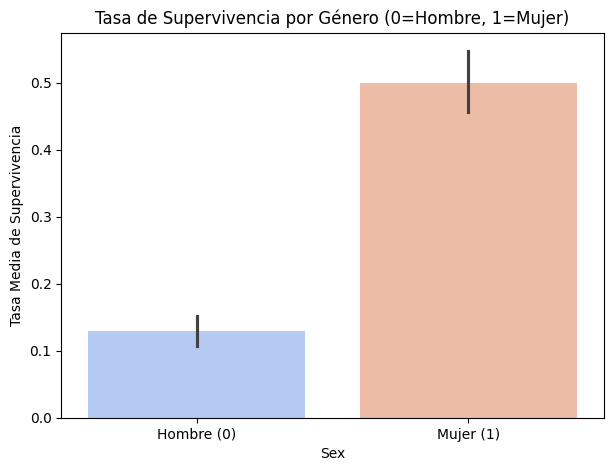

In [8]:
#Impacto de la variable mas importante (Género)
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', hue='Sex', data=df, palette='coolwarm', legend=False)
plt.title('Tasa de Supervivencia por Género (0=Hombre, 1=Mujer)')
plt.ylabel('Tasa Media de Supervivencia')
plt.xticks([0, 1], ['Hombre (0)', 'Mujer (1)'])
plt.show()

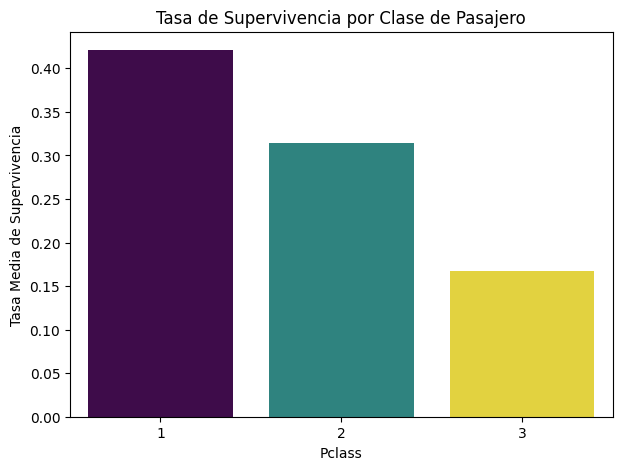

In [9]:
#Análisis del impacto de la clase del pasajero (Pclass)
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=df, palette='viridis', legend=False, errorbar=None)
plt.title('Tasa de Supervivencia por Clase de Pasajero')
plt.ylabel('Tasa Media de Supervivencia')
plt.show()

In [10]:
#Forzar que la columna 'Sex' sea numerica y no object
df['Sex'] = df['Sex'].astype(int)

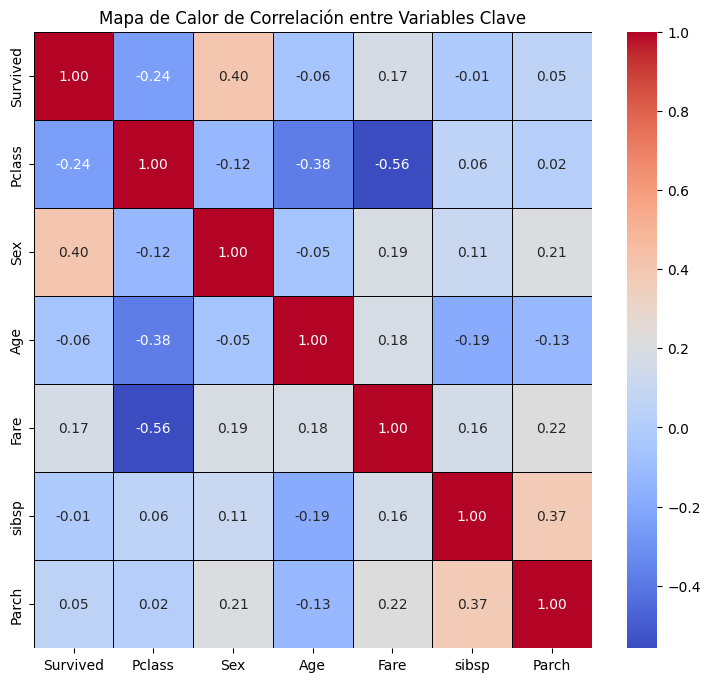

In [11]:
# Análisis de la correlación de variable con heatmap
corr_matrix = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'sibsp', 'Parch']].corr()


# Visualizar la matriz
plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=.5,
            linecolor='black',
            cbar=True)
plt.title('Mapa de Calor de Correlación entre Variables Clave')
plt.show()

##Interpretación del EDA

El dataset 'Titanic' contiene información de pasajeros, incluyendo algunas características sociodemográficas y del viaje, con el objetivo de **predecir la variable 'Survived'.**

Al explorar los datos se observan algunos patrones relevantes:


*   'Género'(Sex): la tasa de supervivencia en mujeres fue significativamente mayor que en hombres, lo que refleja las políticas de evacuación de la época (mujeres y niños primero).
*   'Clase de pasajero' (Pclass): existe una relación clara entre la clase social y la supervivencia. Los pasajeros de primera clase tuvieron una probabilidad de supervivencia mucho más alta en comparación con los de tercera clase.


*   'Edad' (Age): su relación con la supervivencia no es tan evidente como en otras variables.

Analizando el heatmap de correlaciones podemos reforzar estos hallazgos:


*   La variable más correlacionada con 'Survived' es 'Sex', seguida por Fare y Pclass, lo que coincide con los graficos exploratorios.
*   'Age' presenta una correlación mas debil, lo que indica que si bien aporta información, no es tan determinante como el género o la clase del pasajero.


*   También se observan correlaciones entre las variables explicativas (por ejemplo, 'Pclass' y 'Fare' presentan una correlacion negativa, ya que las tarifas mas bajas corresponden a clases más bajas).

En conclusión, este análisis y la implementación de modelos clasificación tendran como fin, a traves de la correcta selección de variables, evaluar la precisión de ambos modelos y analizar sus fortalezas y debilidades para ejercicios similares.









## Preprocesamiento
Habiendo corregido la estructura del dataframe, podemos comenzar con la etapa de preprocesamiento.

In [12]:
#Se detectaron valores faltantes en 'Embarked'

#Imputación de 'Embarked' segun la moda
moda_embarque = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(moda_embarque)

#Conversion de 'Embarked' a tipo int
df['Embarked'] = df['Embarked'].astype(int)

#Verificación de nulos
print('Conteo de valores nulos después de imputar:')
print(df.isnull().sum())

Conteo de valores nulos después de imputar:
Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    0
Survived    0
dtype: int64


In [13]:
#Codificación de 'Embarked' con One-Hot Encoding. No = 1.0 , Si = 2.0
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

print('--- DataFrame después de preprocesamiento ---')
display(df.head())

--- DataFrame después de preprocesamiento ---


,Age,Fare,Sex,sibsp,Parch,Pclass,Survived,Embarked_1,Embarked_2
0,22.0,7.2500,0,1,0,3,0,False,True
1,38.0,71.2833,1,1,0,1,1,False,False
2,26.0,7.9250,1,0,0,3,1,False,True
3,35.0,53.1000,1,1,0,1,1,False,True
4,35.0,8.0500,0,0,0,3,0,False,True


In [14]:
#Definir variables X e Y
X = df.drop('Survived', axis=1)
Y = df['Survived']

In [15]:
#Division de datos para entrenamiento (80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1047, 8)
X_test shape: (262, 8)


## Preparación de los modelos

Se destaca que para el caso del modelo de K-NN es necesario escalar variables para que sean uniformes en cuanto a su tamaño, por ejemplo 'Fare' con valores de cientos frente a 'Age' con valores en decenas.
Con esto logramos que el modelo y sus escalas queden en un rango comparable, se evita que una caracteristica tenga mas 'peso' que otra solo por su magnitud numérica y asi el algoritmo puede evaluar a su vecinos de manera justa, considerando todas las variables en igualdad de condiciones.

In [16]:
#Escalado de caracteristicas para K-NN
scaler = StandardScaler()

#Ajuste y transformación X_train y X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Print de verificación
print(f"\nCaracterísticas de Entrenamiento (escaladas) shape: {X_train_scaled.shape}")
print(f"Características de Prueba (escaladas) shape: {X_test_scaled.shape}")


Características de Entrenamiento (escaladas) shape: (1047, 8)
Características de Prueba (escaladas) shape: (262, 8)


# Implementación de Modelos y Evaluación

## Implementación de Árbol de Decisión


In [17]:
#Entramiento del Árbol de Decisión
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, Y_train)

#Predicción sobre el conjunto de pruebas
Y_pred_dt = dt_classifier.predict(X_test)

In [18]:
#Evaluación
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
report_dt = classification_report(Y_test, Y_pred_dt)

In [19]:
#Print de evaluación
print(f"\n--- ÁRBOL DE DECISIÓN ---")
print(f"Precisión (accuracy): {accuracy_dt:.4f}")
print("\nReporte de Clasificación:")
print(report_dt)


--- ÁRBOL DE DECISIÓN ---
Precisión (accuracy): 0.7863

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       189
           1       0.68      0.44      0.53        73

    accuracy                           0.79       262
   macro avg       0.75      0.68      0.70       262
weighted avg       0.77      0.79      0.77       262




--- Visualización del Árbol de Decisión ---


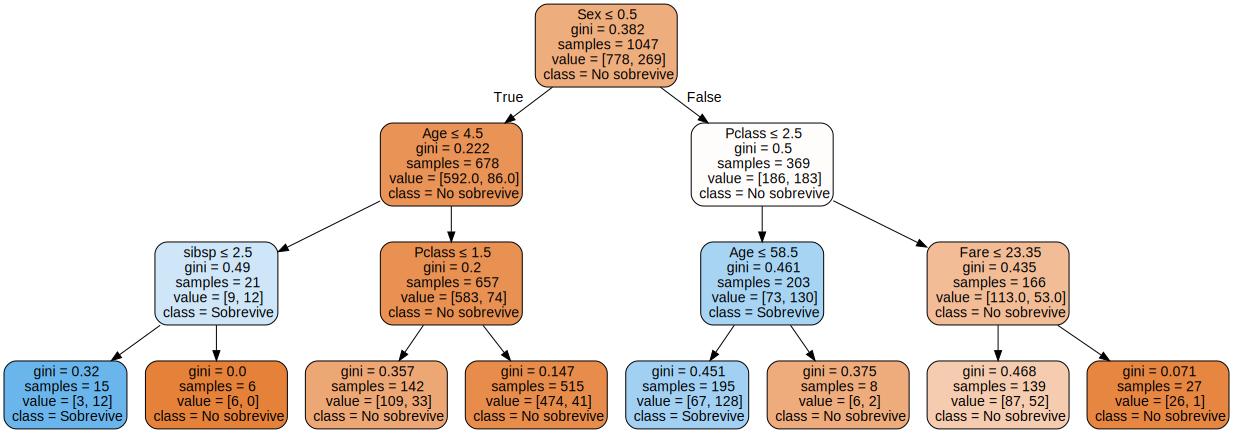

In [20]:
#Grafico 'Graphviz'
feature_names = X.columns.tolist()
dot_data = export_graphviz(
    dt_classifier,
    feature_names=feature_names,
    class_names=['No sobrevive', 'Sobrevive'],
    filled=True,
    rounded=True,
    special_characters=True
    )
graph = graphviz.Source(dot_data)

print('\n--- Visualización del Árbol de Decisión ---')
display(graph)

### Análisis del Modelo: Árbol de Decisión (DT)

El Árbol de Decisión (DT) modelo que permite una interpretación directa de la lógica de clasificación.

1.  **Variable Predictora Principal (Nodo Raíz):** La variable 'Sex' (Género) se estableció como la raíz del árbol. Esto confirma que el factor más determinante para la supervivencia en el Titanic fue, históricamente, el género.
2.  **Reglas Clave:** Las ramificaciones del árbol reflejan la jerarquía de clasificación del rescate ("mujeres y niños primero"). La segunda variable más influyente es 'Pclass' (Clase que viajaba el pasajero), indicando que, dentro de cada grupo de género, la clase social tuvo un impacto decisivo.
3.  **Rendimiento:** El modelo alcanzó una precisión del **78.63%**. Su principal ventaja es la generación de reglas entendibles y de facil lectura, aunque su rendimiento puede ser superado por modelos más complejos.

## Implementación de K-NN

In [21]:
#Entrenamiento del modelo
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, Y_train)

#Predicción sobre el conjunto de pruebas
Y_pred_knn = knn_classifier.predict(X_test_scaled)

In [22]:
#Evaluación del modelo K-NN
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
report_knn = classification_report(Y_test, Y_pred_knn)

In [23]:
#Print de evaluación
print(f"---MODELO K-NN---")
print(f'Precisión (accuracy): {accuracy_knn:.4f}')
print("\nReporte de Clasificación:")
print(report_knn)

---MODELO K-NN---
Precisión (accuracy): 0.7214

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       189
           1       0.50      0.41      0.45        73

    accuracy                           0.72       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.71      0.72      0.71       262



In [24]:
#Preparar el df de prueba con las variables sin escalar
X_test_plot = X_test[['Sex', 'Fare']].copy()

#Agregar la variable REAL para comparar y la predicción de K-NN
X_test_plot['Prediction'] = Y_pred_knn
X_test_plot['Real'] = Y_test.values

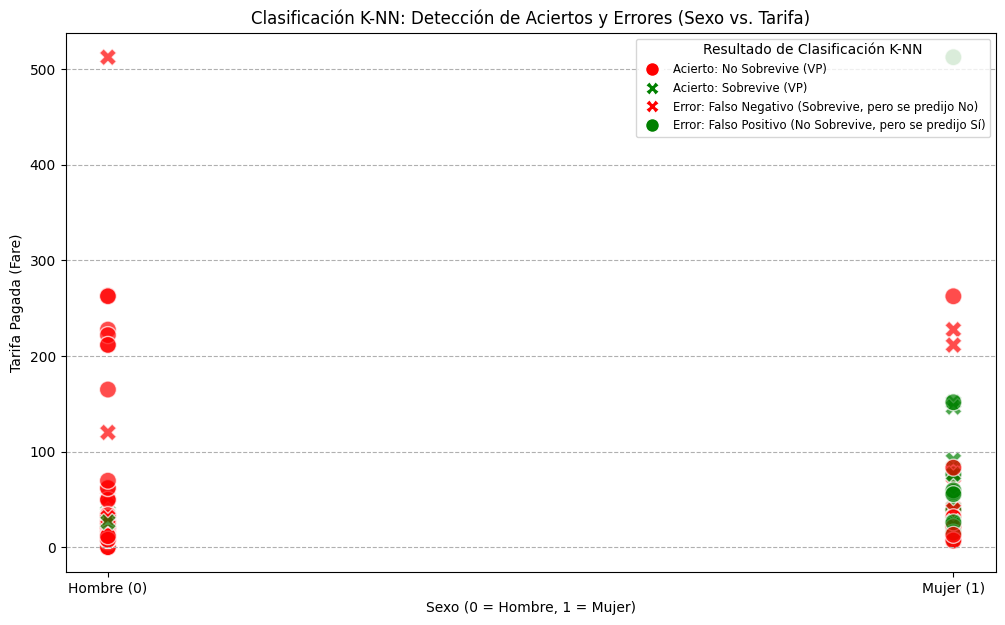

In [25]:
#Visualización
plt.figure(figsize=(12, 7))

sns.scatterplot(
    x='Sex',
    y='Fare',
    hue='Prediction',
    style='Real',
    data=X_test_plot,
    palette={0: 'red', 1: 'green'},
    s=150,
    alpha=0.7,
    markers={0: 'o', 1: 'X'}
)

# Definición de los cuatro elementos clave (Aciertos y Errores)
legend_elements = [
    # Aciertos (Marcador = Color)
    Line2D([0], [0], marker='o', color='w', label='Acierto: No Sobrevive (VP)',
           markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='X', color='w', label='Acierto: Sobrevive (VP)',
           markerfacecolor='green', markersize=10),

    # Errores (Marcador != Color)
    Line2D([0], [0], marker='X', color='w', label='Error: Falso Negativo (Sobrevive, pero se predijo No)',
           markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Error: Falso Positivo (No Sobrevive, pero se predijo Sí)',
           markerfacecolor='green', markersize=10)
]

# Reemplazar la leyenda automática por la manual
plt.legend(handles=legend_elements, title='Resultado de Clasificación K-NN',
           loc='upper right', ncol=1, frameon=True, fontsize='small')


plt.title('Clasificación K-NN: Detección de Aciertos y Errores (Sexo vs. Tarifa)')
plt.xlabel('Sexo (0 = Hombre, 1 = Mujer)')
plt.ylabel('Tarifa Pagada (Fare)')
plt.xticks([0, 1], ['Hombre (0)', 'Mujer (1)'])
plt.grid(axis='y', linestyle='--')
plt.show()

### Análisis del Modelo: K-Nearest Neighbors (K-NN)

K-NN es un modelo basado en la distancia que clasifica un punto en función de la mayoría de sus 'K vecinos más cercanos'. Es considerado un modelo que tiene una alta dependencia del preprocesamiento.

1.  **Preprocesamiento Crucial:** El escalado de características 'StandardScaler' fue un paso obligatorio para K-NN. Esto evito que variables con grandes rangos de valor como 'Fare' dominen la función de distancia sobre otras variables binarias como 'Sex'.
2.  **Rendimiento y Precisión:** El modelo K-NN, con 'K=5', alcanzó una precisión del **72.14%**.
3.  **Análisis Visual (Scatter Plot):** El gráfico de dispersión muestra la clasificación por proximidad en el espacio 'Sex' vs. 'Fare'.
    * La mayoría de los puntos de clase 'Sobrevive' (Verde) se concentran fuertemente en el grupo 'Sex=1' (Mujeres).
    * La visualización de **aciertos y errores** demuestra dónde existieron errores de decisión. Por ejemplo, la concentración de **Falsos Negativos (Cruz Roja)** en la sección de hombres indica casos donde la Tarifa o la Clase no fueron suficientes para mover la decisión de su vecindario dominante (Hombres = No Sobreviven).

#Análisis y Visualización comparativa

## Graficos y Metricas

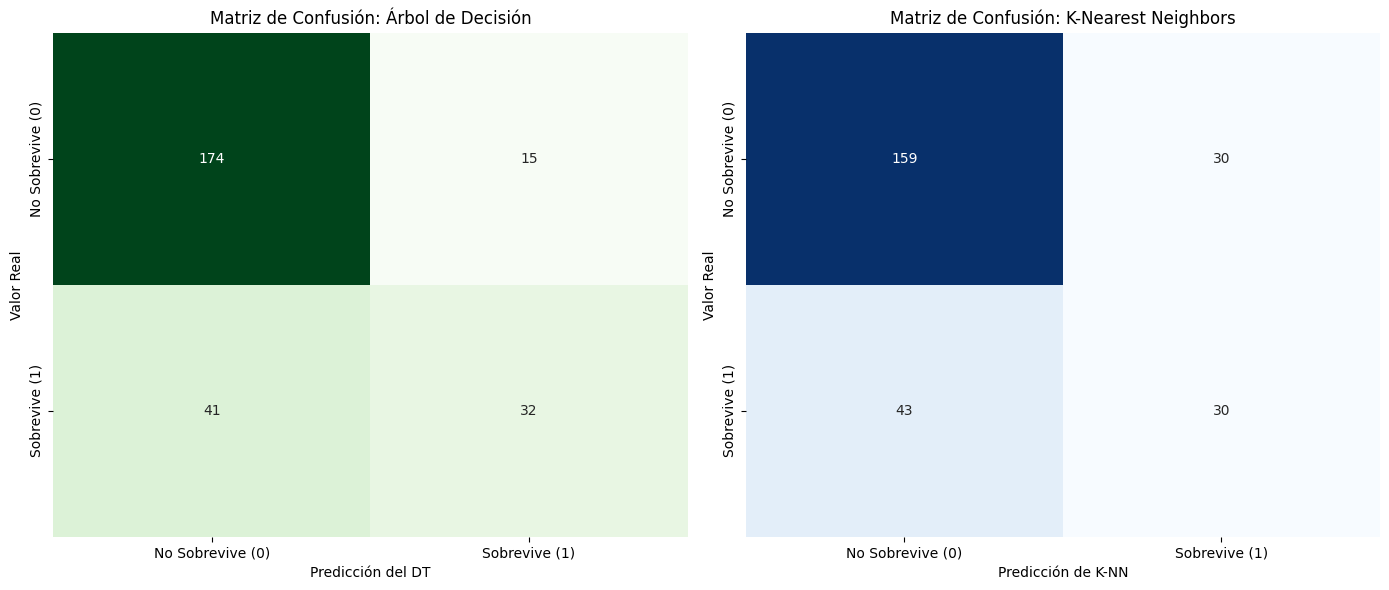

In [26]:
#Matrices de confusión de ambos modelos
fix, axes = plt.subplots(1, 2, figsize=(14, 6))

#Definición de variables para Matrices
cm_dt=confusion_matrix(Y_test, Y_pred_dt)
cm_knn=confusion_matrix(Y_test, Y_pred_knn)

#Matriz de confusión del árbol de decisión
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Sobrevive (0)', 'Sobrevive (1)'],
            yticklabels=['No Sobrevive (0)', 'Sobrevive (1)'],
            ax=axes[0]) # **CRUCIAL: Especificar el primer eje**
axes[0].set_title('Matriz de Confusión: Árbol de Decisión')
axes[0].set_xlabel('Predicción del DT')
axes[0].set_ylabel('Valor Real')

#Matriz de confusión del modelo K-NN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Sobrevive (0)', 'Sobrevive (1)'],
            yticklabels=['No Sobrevive (0)', 'Sobrevive (1)'],
            ax=axes[1]) # **CRUCIAL: Especificar el segundo eje**
axes[1].set_title('Matriz de Confusión: K-Nearest Neighbors')
axes[1].set_xlabel('Predicción de K-NN')
axes[1].set_ylabel('Valor Real')

#Ajuste de diseño para evitar titulos superpuestos
plt.tight_layout()
plt.show()

In [27]:
#Metricas de ambos modelos
print(f"\n--- ÁRBOL DE DECISIÓN ---")
print(f"Precisión (accuracy): {accuracy_dt:.4f}")
print("\nReporte de Clasificación:")
print(report_dt)

print(f"---MODELO K-NN---")
print(f'Precisión (accuracy): {accuracy_knn:.4f}')
print("\nReporte de Clasificación:")
print(report_knn)


--- ÁRBOL DE DECISIÓN ---
Precisión (accuracy): 0.7863

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       189
           1       0.68      0.44      0.53        73

    accuracy                           0.79       262
   macro avg       0.75      0.68      0.70       262
weighted avg       0.77      0.79      0.77       262

---MODELO K-NN---
Precisión (accuracy): 0.7214

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       189
           1       0.50      0.41      0.45        73

    accuracy                           0.72       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.71      0.72      0.71       262



## Análisis comparativo y Conclusión final
El objetivo principal de este analisis es evaluar el comportamiento de ambos modelos frente a un mismo dataset y mismo entrenamiento.

Al comparar las metricas resultantes vemos que el modelo 'Árbol de Decisión' logro una mayor precision que el modelo 'K-NN **(78.63% vs 72.14%)**, demostrando para este ejercicio ser un predictor mas robusto.
Su baja tasa de falsos negativos frente a K-NN (41 vs 55) indica que el modelo logra capturar de manera mas efectiva la regla de 'Mujeres y niños primero) a traves de sus divisiones jerarquicas.

Por otra parte, K-NN depende solo de la proximidad y no de la jerarquia del dato, hace que este modelo sea mas propenso a errores de falso negativo, lo que sugiere que sus decisiones se vieron facilmente influenciadas por la densidad de vecinos de la clase 0 (No Sobrevive), abrumando a los supervivientes reales..


Analizando los mapas de calor podemos ver que el 'Árbol de Decisión' tuvo muchos menos errores a la hora de interpretar y clasificar los datos:


| Métrica | Árbol de Decisión (DT) | K-NN (K=5) | Análisis Clave |
| :--- | :---: | :---: | :--- |
| **Precisión (Accuracy)** | **78.63%** | **72.14%** | El DT es más robusto. |
| **Verdaderos Negativos** | 174 | 159 | El DT es ampliamente mejor en la identificación de aquellos que no sobrevivieron.|
| **Verdaderos Positivos**| 32 | 18 | El DT vuelve a ser mejor para la detección de sobrevivientes reales.|
| **Falsos Negativos (FN)** | 41 | 55 | El DT reduce el error crítico (Sobrevivió, pero se predijo No). |
| **Falsos Positivos (FP)** | 15 | 30 | El DT es más conservador.(No sobrevivió, pero se predijo Si). |
| **Interpretabilidad** | **Alta (Reglas Claras)** | Baja (Basado en Distancia) | El DT explica el fenómeno histórico. |

## Conclusion Final

Para este ejercicio, podemos inferir que el mejor modelo es el **Árbol de decisión**, ya que no solamente es superior al modelo K-NN, sino que tambien ofrece una interpretacion mas sujeta a un hecho historico('Mujeres y niños primero).